<a href="https://colab.research.google.com/github/farhan1503001/Satelite-Image-Segmentation/blob/main/Visualizing_xceptionet_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 6.3 MB/s 


In [7]:
import tensorflow as tf
import cv2
import os

In [15]:
Input=tf.keras.layers.Input(shape=(224,224,3))
feature=tf.keras.applications.InceptionV3(include_top=False,weights='imagenet',input_tensor=Input)
x=feature.output
x=tf.keras.layers.Flatten()(x)
output=tf.keras.layers.Dense(1000,activation='softmax')(x)
Model=tf.keras.models.Model(inputs=Input,outputs=output)
Model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_564 (Conv2D)            (None, 111, 111, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_564 (Batch  (None, 111, 111, 32  96         ['conv2d_564[0][0]']             
 Normalization)                 )                                                           

In [16]:
#Now defining learning parameters and other things for our model
sgd=tf.keras.optimizers.SGD(learning_rate=0.001,decay=1e-6,momentum=0.9,nesterov=True)
Model.compile(optimizer=sgd,loss='categorical_crossentropy')

In [27]:
#Now trying to understand the model layers
layers=Model.layers
print(layers[1].name)
filters=Model.layers[1].get_weights()[0]
#print(layers[1].name,filters.shape)
print(filters.shape)

conv2d_564
(3, 3, 3, 32)


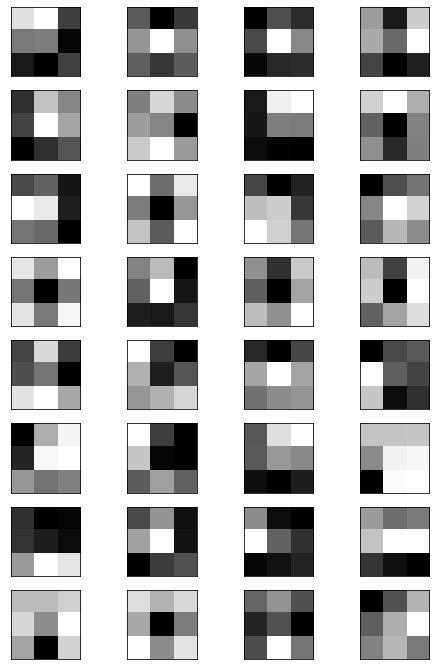

In [31]:
#Now plotting filters
import matplotlib.pyplot as plt
fig1=plt.figure(figsize=(8,12))
row=8
col=4
n_filters=row*col
for i in range(1,n_filters+1):
  #Finding the value
  filter=filters[:,:,:,i-1]
  fig1=plt.subplot(row,col,i)
  fig1.set_xticks([])  #Turn off axis
  fig1.set_yticks([])
  plt.imshow(filter[:, :, 1], cmap='gray') 

plt.show()

In [32]:
#Now we need a shorter model for generating our output
conv_layer_index=[1,3,6]
short_output=[Model.layers[i].output for i in conv_layer_index]
short_model=tf.keras.models.Model(inputs=Input,outputs=short_output)
print(short_model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_564 (Conv2D)         (None, 111, 111, 32)      864       
                                                                 
 batch_normalization_564 (Ba  (None, 111, 111, 32)     96        
 tchNormalization)                                               
                                                                 
 activation_564 (Activation)  (None, 111, 111, 32)     0         
                                                                 
 conv2d_565 (Conv2D)         (None, 109, 109, 32)      9216      
                                                                 
 batch_normalization_565 (Ba  (None, 109, 109, 32)     96        
 tchNormalization)                                         

In [36]:
#Now loading image to to predict
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array
img=load_img('monalisa.jpg',target_size=(224,224,3))
img=img_to_array(img)
#Now expanding dimension
img=np.expand_dims(img,axis=0)
feature_output=short_model.predict(img)

In [38]:
print(len(feature_output))

3


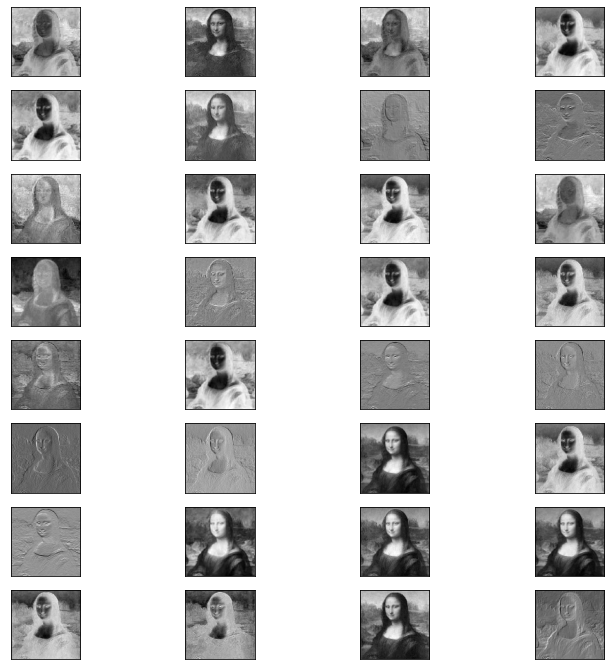

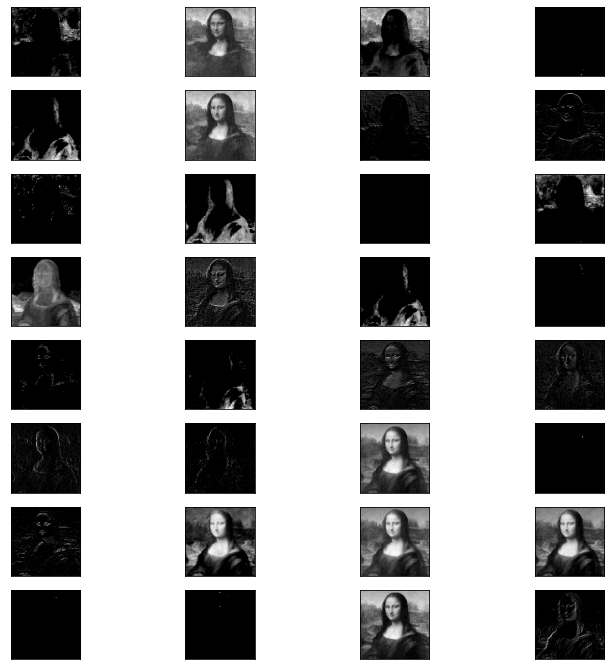

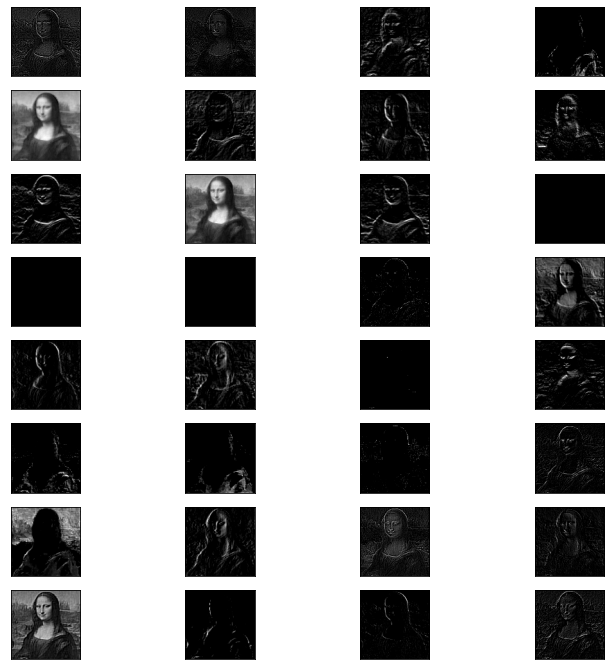

In [39]:
row=8
col=4
for feature in feature_output:
  fig=plt.figure(figsize=(12, 12))
  for i in range(1, col*row +1):
        fig =plt.subplot(row, col, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(feature[0, :, :, i-1], cmap='gray')
        #pos += 1
  plt.show()